# In this project we will analyze a movie dataset from Kaggle, and it contains data for the last Four decades in the film industry

- We will find the correlation between the budget of the movies and the revenue.
- We will analyze the other factors inside the dataset to get insights like:
  - How much was the revenue for each company?
  - Which genre generated the most revenue over the past 4 decades?
  - IS there any relation between the rating and the revenue? / How much each rating group genrated revenue?
  


In [2]:
# First let's import the packages we will use in this project
import pandas as pd
import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r"C:\Users\Mostafa ElBassel\Downloads\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Checking the info of the data frame:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# As we will find correlation between the budget and the gross, we need to change the datatype for each of them to int:

df['budget'] = df['budget'].astype("Int64")
df['gross'] = df['gross'].astype("Int64")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   Int64  
 12  gross     7479 non-null   Int64  
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: Int64(2), float64(3), int64(1), object(9)
memory usage: 913.7+ KB


### As there are difference between the 'released' and the 'year' columns, we will be fix that by making the 'year' col matching the 'released' one, then, we will delete the year column.
### At first we will change the datatype of the released_year to str to extract the year and append it to a new column.

In [7]:
df['released'] = df['released'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   Int64  
 12  gross     7479 non-null   Int64  
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: Int64(2), float64(3), int64(1), object(9)
memory usage: 913.7+ KB


### After we changed the data type of the 'released' column to String, we took only the date from that column and put it in a new column called 'released_date', and we changed the data type of that column to be datetime.


In [10]:
df['released_date'] = pd.to_datetime(df['released'].str.split('(').str[0], format='mixed')

In [11]:
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
5929,Drive Angry,R,Action,2011,"February 25, 2011 (United States)",5.4,96000.0,Patrick Lussier,Todd Farmer,Nicolas Cage,United States,50000000,40909909,Summit Entertainment,104.0,2011-02-25
4597,Johnson Family Vacation,PG-13,Comedy,2004,"April 7, 2004 (United States)",4.5,7400.0,Christopher Erskin,Todd R. Jones,Cedric the Entertainer,United States,12000000,31326183,Fox Searchlight Pictures,97.0,2004-04-07
5852,Just Go with It,PG-13,Comedy,2011,"February 11, 2011 (United States)",6.4,227000.0,Dennis Dugan,Allan Loeb,Adam Sandler,United States,80000000,214945591,Columbia Pictures,117.0,2011-02-11
5916,Martha Marcy May Marlene,R,Drama,2011,"December 21, 2011 (Sweden)",6.9,50000.0,Sean Durkin,Sean Durkin,Elizabeth Olsen,United States,<NA>,4778439,Fox Searchlight Pictures,102.0,2011-12-21
1576,The Experts,PG-13,Comedy,1989,"January 13, 1989 (United States)",4.8,2300.0,Dave Thomas,Steven Greene,John Travolta,Canada,<NA>,169203,Paramount Pictures,94.0,1989-01-13


### In the following code, we will create a new column called 'released_Year',   and append the year only from the 'released_date' to it. Also, we will changed the data type of that column to be integer. Then, we will drop the 'year' & 'released' columns from our data frame.

In [13]:
df['released_year'] = df['released_date'].dt.year.astype("Int64")
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_year
4400,Beyond Borders,R,Adventure,2003,"October 24, 2003 (United States)",6.5,26000.0,Martin Campbell,Caspian Tredwell-Owen,Clive Owen,Germany,35000000,11705002,Mandalay Pictures,127.0,2003-10-24,2003
2638,Getting Even with Dad,PG,Comedy,1994,"June 17, 1994 (United States)",4.8,7600.0,Howard Deutch,Tom S. Parker,Macaulay Culkin,United States,30000000,18869594,Metro-Goldwyn-Mayer (MGM),109.0,1994-06-17,1994
3964,Valentine,R,Horror,2001,"February 2, 2001 (United States)",4.8,26000.0,Jamie Blanks,Tom Savage,Denise Richards,Canada,29000000,36684136,Warner Bros.,96.0,2001-02-02,2001
2912,Ransom,R,Action,1996,"November 8, 1996 (United States)",6.7,121000.0,Ron Howard,Cyril Hume,Mel Gibson,United States,80000000,309492681,Touchstone Pictures,121.0,1996-11-08,1996
2678,Casper,PG,Comedy,1995,"May 26, 1995 (United States)",6.1,125000.0,Brad Silberling,Joseph Oriolo,Bill Pullman,United States,50000000,287928194,Universal Pictures,100.0,1995-05-26,1995


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           7668 non-null   object        
 1   rating         7591 non-null   object        
 2   genre          7668 non-null   object        
 3   year           7668 non-null   int64         
 4   released       7668 non-null   object        
 5   score          7665 non-null   float64       
 6   votes          7665 non-null   float64       
 7   director       7668 non-null   object        
 8   writer         7665 non-null   object        
 9   star           7667 non-null   object        
 10  country        7665 non-null   object        
 11  budget         5497 non-null   Int64         
 12  gross          7479 non-null   Int64         
 13  company        7651 non-null   object        
 14  runtime        7664 non-null   float64       
 15  released_date  7666 n

In [15]:
df.drop(columns=['year', 'released'], inplace=True)
df.sample(5)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_year
48,The Nude Bomb,PG,Action,5.1,3100.0,Clive Donner,Mel Brooks,Don Adams,United States,15000000,14662035,Universal Pictures,94.0,1980-05-09,1980
5202,Hotel for Dogs,PG,Comedy,5.4,22000.0,Thor Freudenthal,Jeff Lowell,Emma Roberts,Germany,35000000,117252578,Dreamworks Pictures,100.0,2009-01-16,2009
1338,Time of the Gypsies,R,Comedy,8.2,29000.0,Emir Kusturica,Emir Kusturica,Davor Dujmovic,Yugoslavia,<NA>,<NA>,Forum Sarajevo,142.0,1990-02-09,1990
7392,Gringo,R,Action,6.1,28000.0,Nash Edgerton,Anthony Tambakis,Joel Edgerton,Australia,<NA>,11001627,Amazon Studios,111.0,2018-03-09,2018
2472,"The Adventures of Priscilla, Queen of the Desert",R,Comedy,7.5,48000.0,Stephan Elliott,Stephan Elliott,Hugo Weaving,Australia,<NA>,11265402,PolyGram Filmed Entertainment,104.0,1994-08-10,1994


### Now, let's return to find the correlation between the 'budget' & 'gross', so, the first thing to do is to sort the data frame by the gross values:

In [17]:
df = df.sort_values('gross', ascending=False)
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_year
5445,Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90.0,2020-10-23,2020
7664,Dream Round,NaN,Comedy,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90.0,2020-02-07,2020
7665,Saving Mbango,NaN,Drama,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,NaN,2020-04-27,2020
7666,It's Just Us,NaN,Drama,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120.0,2020-10-01,2020


In [18]:
# Let's drop any duplicats: 

df = df.drop_duplicates()
df

# It dropped only one duplicated row.

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_year
5445,Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90.0,2020-10-23,2020
7664,Dream Round,NaN,Comedy,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90.0,2020-02-07,2020
7665,Saving Mbango,NaN,Drama,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,NaN,2020-04-27,2020
7666,It's Just Us,NaN,Drama,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120.0,2020-10-01,2020


### In the next part, we will show some visulaizations to show up the correlation between the budget and the gross revenue.

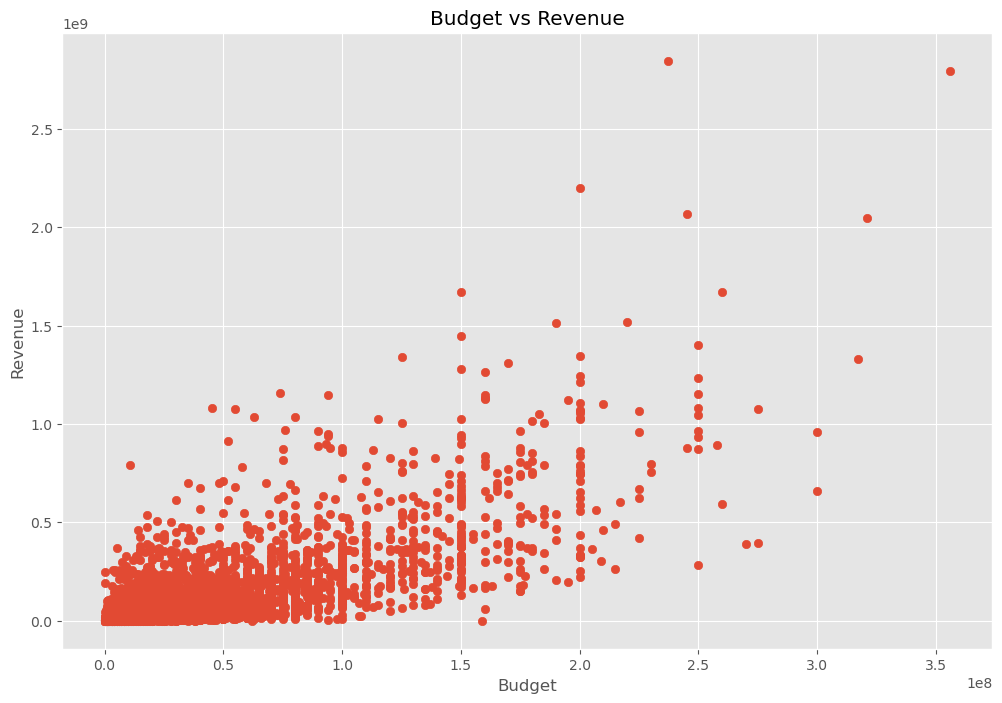

In [20]:
plt.scatter(df['budget'], df['gross'])
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

### As we can see in the above scatter, most of the movies's revenue is high when the budget is high, but, there are some exceptions here, as some movies's revenue isn't high although the budget is high.

### Below, we will show another scatter that will emphasize the correlation.

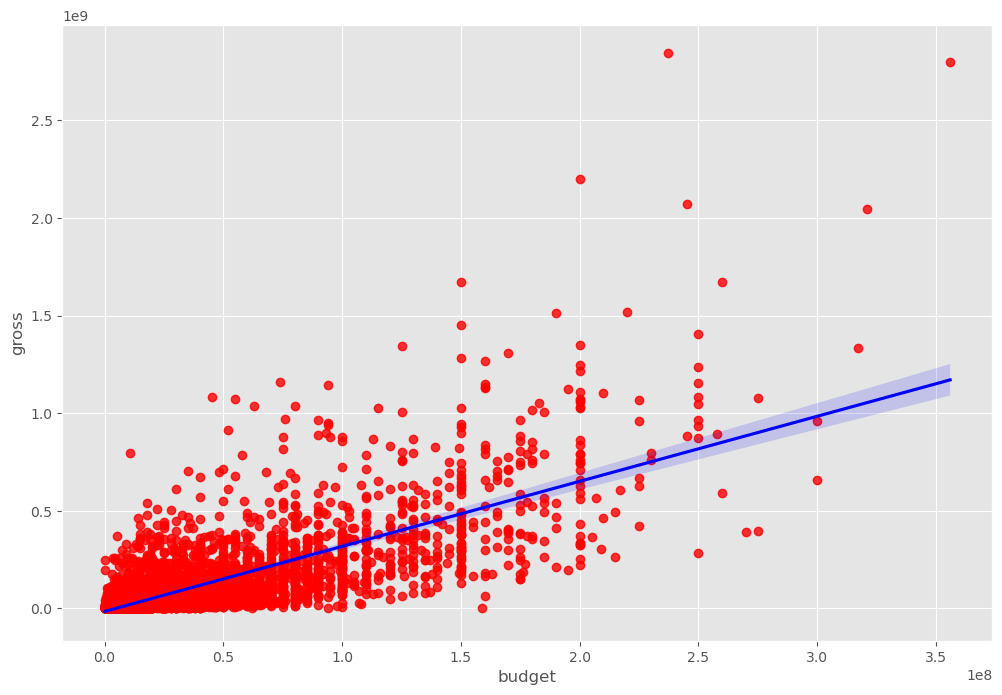

In [22]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.show()

<H4 style="color: blue">The above added line confirms the hypothesis: Higher budget means higher revenue (For sure there are exceptions).</H4>

<H3 style="color: green">Another way to find the correlation is by computing the correlation matrix of a DataFrame.</H3>

In [25]:
numeric_df = df.select_dtypes(include=[float, int]) # to apply df.corr(), we isolated the numeric columns to use them.

numeric_df.corr() #Using the df.corr() to check the correlation matrix between the budget & gross while showing the other features as well

,score,votes,budget,gross,runtime,released_year
score,1.000000,0.409182,0.076254,0.186258,0.399451,0.105994
votes,0.409182,1.000000,0.442429,0.630757,0.309212,0.218429
budget,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918
gross,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514
runtime,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636
released_year,0.105994,0.218429,0.321918,0.250514,0.120636,1.000000


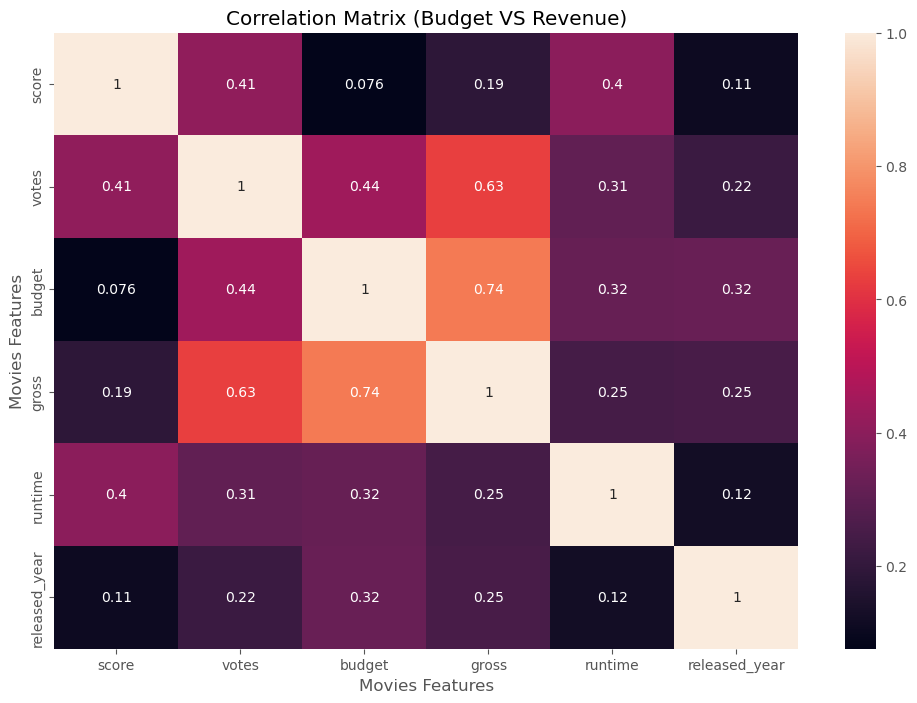

In [26]:
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix (Budget VS Revenue)')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')

plt.show()

<h4 style="color: green">As we can see in the above heatmap, the correlation between the "budget" & "gross" is high</h4>

---


<h3 style="color: blue">As we going on to get insights from our dataset, we will check the companies, How many movie they produced? and How much was their revenue for the last three decades? Let's check that...
    </h3>

In [30]:
Companies_revenue = df.groupby('company').agg( #we grouped by the company name / 
    Total_movies=('name', 'count'),  # then, we counted the movies for each company / 
    Total_gross=('gross', 'sum') # then, we summed the total revenue for each on of them
).reset_index()

pd.set_option('display.max_rows', None)

#print(Companies_revenue)

top_ten_companies = Companies_revenue.sort_values(['Total_gross'], ascending=False).head(10)
top_ten_companies
#Here we sorted the result to find the total revenue for each company for the last four decades / The highest 10 companies only


,company,Total_movies,Total_gross
2319,Warner Bros.,334,56491421806
2281,Universal Pictures,377,52514188890
731,Columbia Pictures,332,43008941346
1812,Paramount Pictures,320,40493607415
2253,Twentieth Century Fox,240,40257053857
2316,Walt Disney Pictures,123,36327887792
1713,New Line Cinema,174,19883797684
1606,Marvel Studios,12,15065592411
887,DreamWorks Animation,28,11873612858
2232,Touchstone Pictures,132,11795832638


<h4 style="color: red">Another important insight for the film makers is which genre is selling more, and down here is the answer.</h4>

In [32]:
genre_revenue = df.groupby('genre').agg( #we grouped by the genre
    Total_movies=('name', 'count'),  # then, we counted the movies for each genre
    Total_gross=('gross', 'sum') # then, the total revenue for each genre
).reset_index()

top_ten_genre = genre_revenue.sort_values(['Total_gross'], ascending=False).head(10)
top_ten_genre

# You can see check the answer!

,genre,Total_movies,Total_gross
0,Action,1705,243435855754
4,Comedy,2245,97175468462
2,Animation,338,80142045796
6,Drama,1518,57150648537
1,Adventure,427,45916596693
5,Crime,551,21355448322
3,Biography,443,20729581801
10,Horror,322,14543329602
7,Family,11,2157897417
13,Mystery,20,2023670554


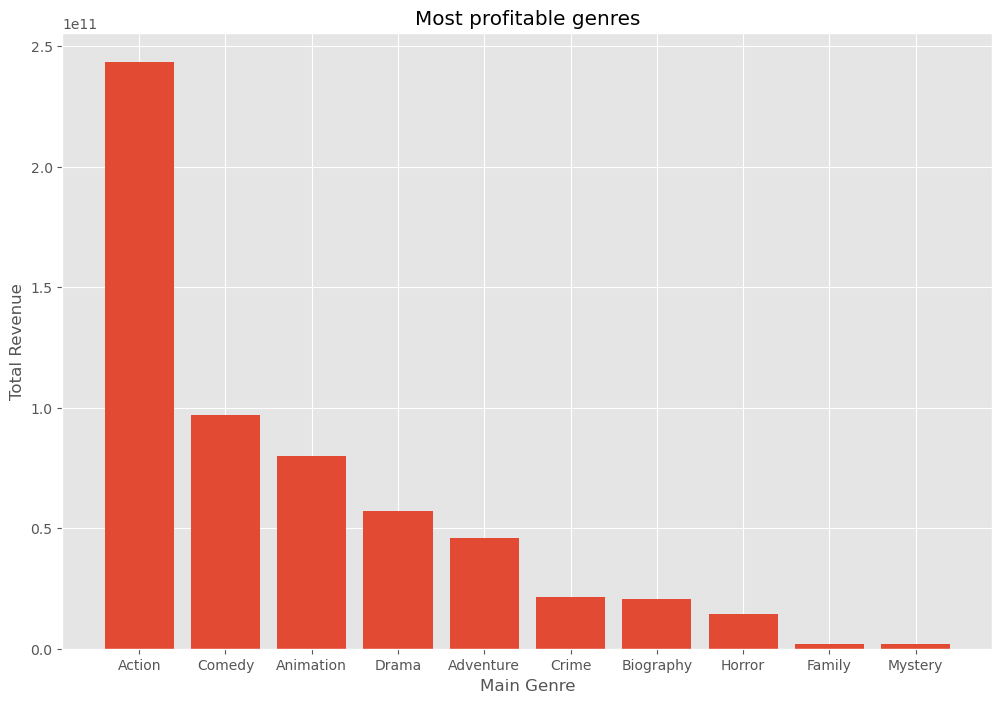

In [33]:
plt.bar(top_ten_genre['genre'], top_ten_genre['Total_gross'])
plt.xlabel('Main Genre')
plt.ylabel('Total Revenue')
plt.title("Most profitable genres")

plt.show()

### Checking which rating group is selling more.

In [35]:
rating_revenue = df.groupby('rating').agg( #we grouped by the Rating
    Total_movies=('name', 'count'),  # then, we counted the movies for each Rating group
    Total_gross=('gross', 'sum') # then, the total revenue for each one
).reset_index()

top_rate = rating_revenue.sort_values(['Total_gross'], ascending=False)
top_rate
# AS we can see below the PG-13, R, and PG rating systems are the top three in gaining revenues.

,rating,Total_movies,Total_gross
5,PG-13,2112,273664111178
6,R,3697,154162445650
4,PG,1252,130071562164
1,G,153,21590586882
3,Not Rated,283,4609138432
8,TV-MA,9,712537041
9,TV-PG,5,601412409
2,NC-17,23,247554585
10,Unrated,52,75440604
0,Approved,1,36565280


In [76]:
top_companies = Companies_revenue.to_csv("Companies_revenue.csv", index=False)

In [78]:
top_genres = genre_revenue.to_csv("genre_revenue.csv", index=False)

In [80]:
top_rating = rating_revenue.to_csv("rating_revenue.csv", index=False)